In [1]:
pip install ucimlrepo

In [109]:
# Cargamos el dataset
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets
df = pd.concat([X, y], axis=1)

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

'''
Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Wine Quality [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.
'''


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

'\nCortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Wine Quality [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.\n'

# EDA - Exploración de Datos

Descripción del dataset: Wine Quality

Información general:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB
None 

Tamaño del dataset: (6497, 12)

Primeras filas del dataset

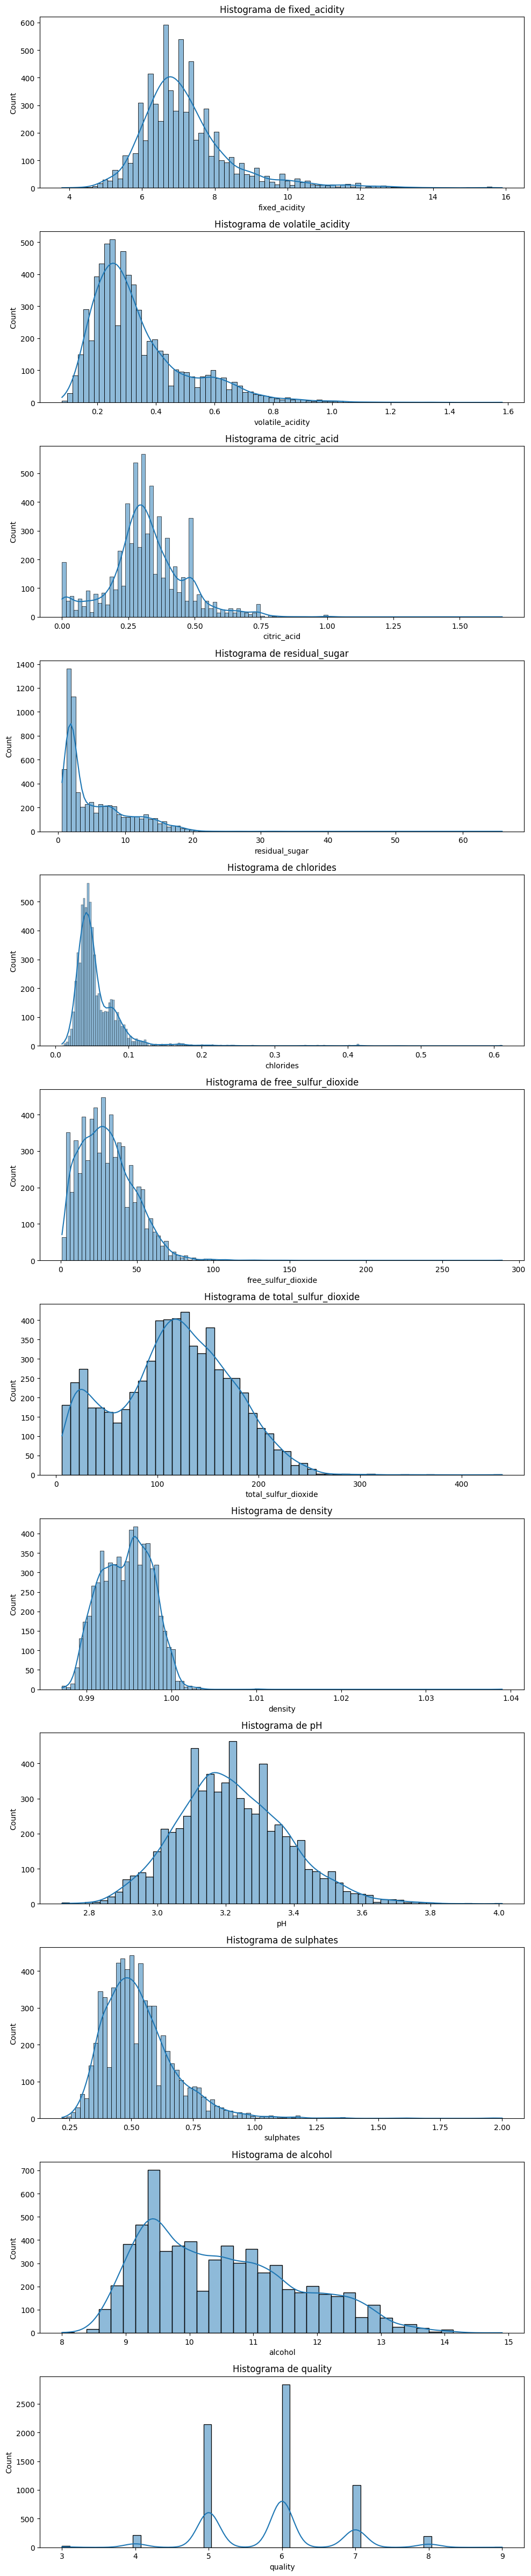

Mapa de calor de correlación entre variables numéricas:



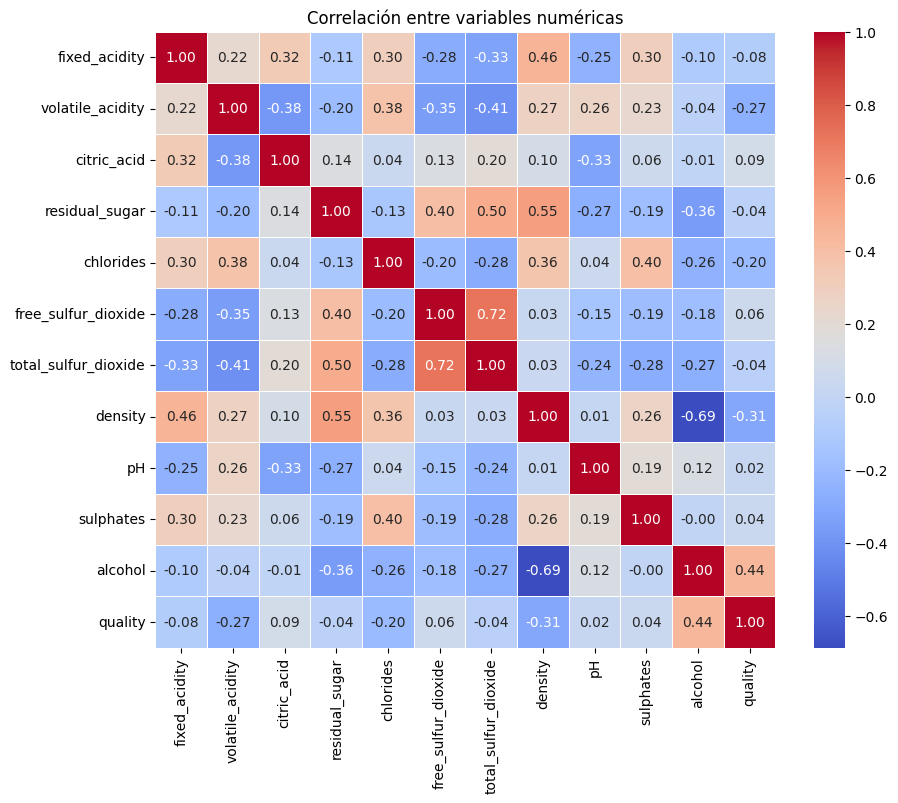

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# he creado una funcion para cargar y describir el conjunto de datos
def describe_dataset(df, name):
    print(f"Descripción del dataset: {name}\n")

    # Definimos columnas numéricas y categóricas
    num_cols = df.select_dtypes(include=[np.number]).columns
    cat_cols = df.select_dtypes(include=['object']).columns

    print("Información general:\n")
    print(df.info(), "\n")

    print(f"Tamaño del dataset: {df.shape}\n")

    print("Primeras filas del dataset:\n")
    print(df.head(), "\n")

    print("Descripción estadística:\n")
    print(df.describe(), "\n")

    print("Variables categóricas:\n")
    for columna in cat_cols:
        print(f"Valores únicos en {columna}:\n")
        print(df[columna].unique(), "\n")

    print("Valores nulos:\n")
    print(df.isnull().sum(), "\n")

    print("Valores duplicados:\n")
    print(df.duplicated().sum(), "\n")

    # Graficamos histogramas para analizar la distribucion de cada columna numérica
    print("Histogramas para variables numéricas:\n")
    plt.figure(figsize=(10, len(num_cols) * 4))
    for i, columna in enumerate(num_cols, 1):
        plt.subplot(len(num_cols), 1, i)
        sns.histplot(data=df, x=columna, kde=True)
        plt.title(f"Histograma de {columna}")
    plt.tight_layout()
    plt.show()

    # Visualizamos la correlación entre variables numéricas con un mapa de calor
    print("Mapa de calor de correlación entre variables numéricas:\n")
    correlation_matrix = df[num_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlación entre variables numéricas")
    plt.show()

# Aplicamos la funcion con el df
describe_dataset(df, 'Wine Quality')

# Resultados del Analisis y Limpieza de datos

In [42]:
'''
RESULTADOS DEL ANALISIS
- 1179 Duplicados
- Todas las columnas son numericas como corresponde
- No hay inconsistencias en valores categoricos ya que todas son columnas numericas
- No hay valores nulos

ACCIONES DE LIMPIEZA
- Eliminaremos los duplicados
'''
df_clean = df.drop_duplicates()

Gráficos de barras para calidad y alcohol:



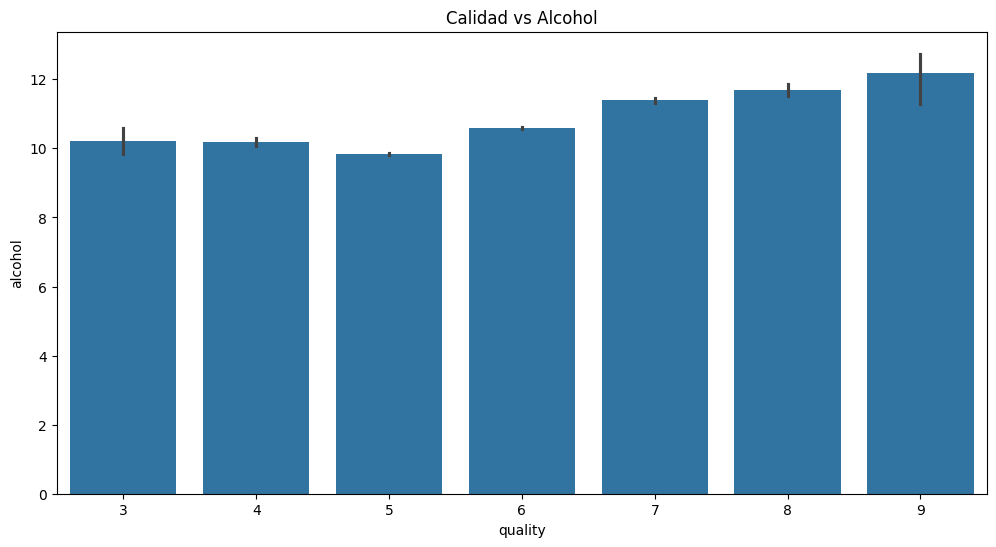

Gráfico de dispersión para calidad y alcohol:



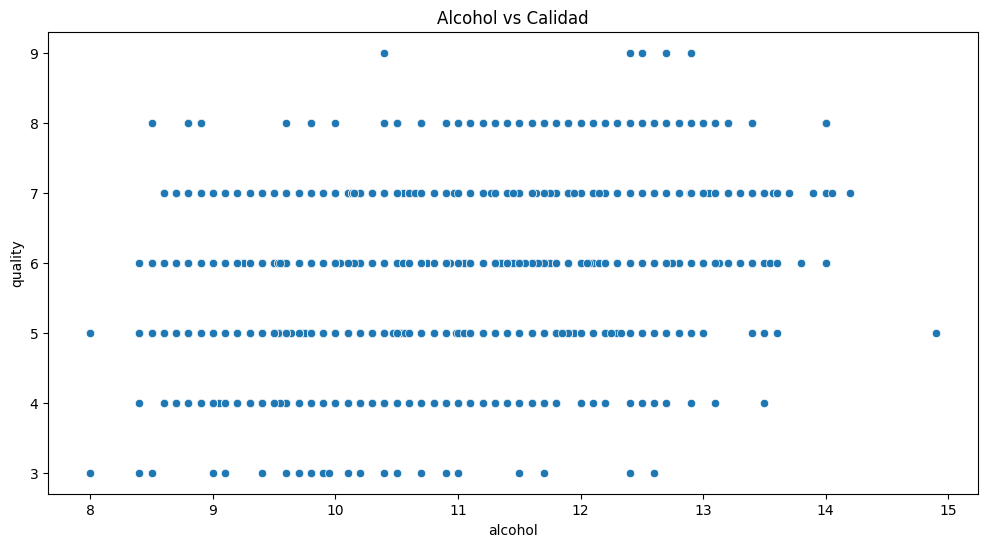

Gráficos de barras para densidad y alcohol:



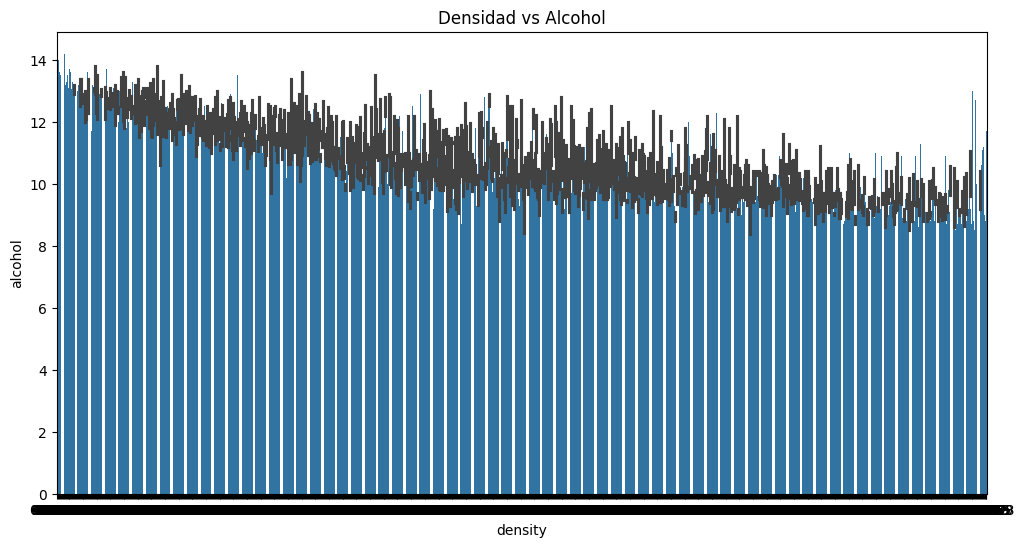

Gráfico de dispersión para densidad y alcohol:



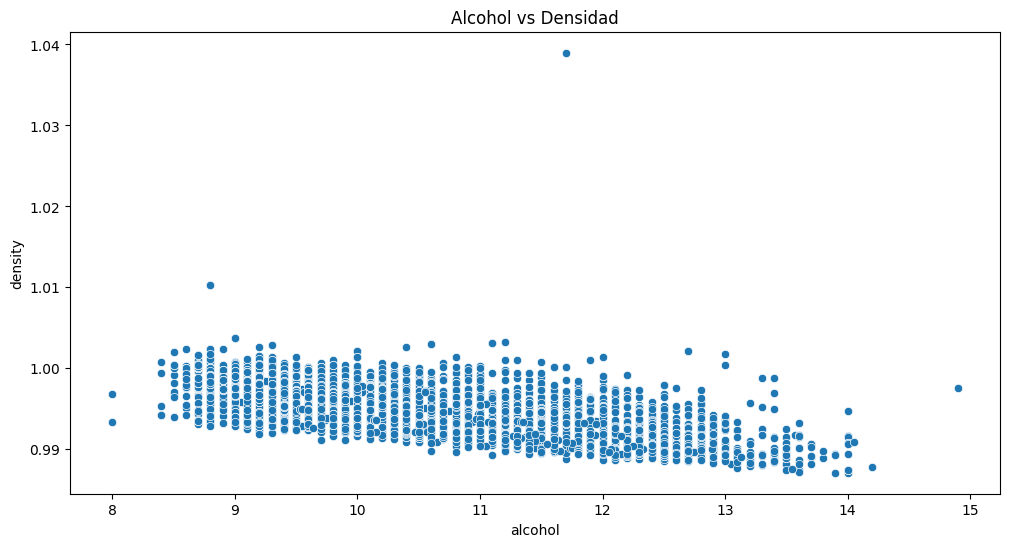

'\nPodemos observar y concluir como a la par que sube el grado de alcohol, disminuye la densidad del vino.\n'

In [99]:
# Creamos graficos de barras y dispersion para las relaciones mas importantes entre las variables

# Ya que observamos una relacion relativamente directa entre la calidad y el grado de alcohol (0.44)
print("Gráficos de barras para calidad y alcohol:\n")
plt.figure(figsize=(12, 6))
sns.barplot(x='quality', y='alcohol', data=df)
plt.title("Calidad vs Alcohol")
plt.show()

print("Gráfico de dispersión para calidad y alcohol:\n")
plt.figure(figsize=(12, 6))
sns.scatterplot(x='alcohol', y='quality', data=df)
plt.title("Alcohol vs Calidad")
plt.show()

'''
Podemos observar y concluir como a la par que sube el grado de alcohol, tambien sube la calidad del vino.
'''

# Como observamos una relacion relativamente indirecta entre la densidad y el grado de alcohol
print("Gráficos de barras para densidad y alcohol:\n")
plt.figure(figsize=(12, 6))
sns.barplot(x='density', y='alcohol', data=df)
plt.title("Densidad vs Alcohol")
plt.show()

print("Gráfico de dispersión para densidad y alcohol:\n")
plt.figure(figsize=(12, 6))
sns.scatterplot(x='alcohol', y='density', data=df)
plt.title("Alcohol vs Densidad")
plt.show()

'''
Podemos observar y concluir como a la par que sube el grado de alcohol, disminuye la densidad del vino.
'''

# Estadisticas descriptivas

In [100]:
df_clean.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000
mean,7.215523,0.344171,0.318522,5.049605,0.056700,30.030463,114.107747,0.994536,3.224639,0.533402,10.549222,5.795600
std,1.319777,0.168264,0.147177,4.500645,0.036865,17.804365,56.783848,0.002966,0.160403,0.149753,1.185964,0.879715
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994660,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.750000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# Implementación de Modelos

Modelos de Clasificación: Implementa modelos de Logistic Regression y K-Nearest Neighbors (KNN).

Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, y F1-score.

Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

X = wine_quality.data.features
y = wine_quality.data.targets

# Establecemos umbral para "alta calidad" y "baja calidad"
umbral = 6.5 # Considero este un umbral justo
y = (y >= umbral).astype(int)

# Dividimos los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5851454)

num_cols = make_column_selector(dtype_include=np.number)
cat_cols = make_column_selector(dtype_exclude=np.number)

# Creamos un pipeline con los transformadores
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))
preprocessor = make_column_transformer((num_pipeline, num_cols), (cat_pipeline, cat_cols))

# Creamos un pipeline para cada modelo a utilizar
pipeline_lr = make_pipeline(preprocessor, LogisticRegression())
pipeline_knn = make_pipeline(preprocessor, KNeighborsClassifier())

# Hacemos el fit para cada uno
pipeline_lr.fit(X_train, y_train)
pipeline_knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x78e8c2a0d3f0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x78e8c3204490>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [111]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

# Realizamos predicciones con los datos de prueba
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_knn = pipeline_knn.predict(X_test)

# Evaluamos los modelos
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

print("\nK-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

'''
Ambos modelos arrojan resultados muy buenos y similares entre si, donde KNN supera levemente en aciertos a LinearRegression.
Realizaremos una validacion cruzada para comprobar los resultados y veremos si podemos encontrar mejores hiperparametros
'''

Logistic Regression:
Accuracy: 0.8223076923076923
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      1053
           1       0.56      0.28      0.38       247

    accuracy                           0.82      1300
   macro avg       0.71      0.62      0.64      1300
weighted avg       0.80      0.82      0.80      1300

Confusion Matrix:
 [[999  54]
 [177  70]]

K-Nearest Neighbors:
Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1053
           1       0.62      0.53      0.57       247

    accuracy                           0.85      1300
   macro avg       0.76      0.73      0.74      1300
weighted avg       0.84      0.85      0.84      1300

Confusion Matrix:
 [[975  78]
 [117 130]]


'\nAmbos modelos arrojan resultados muy buenos y similares entre si, donde KNN supera levemente en aciertos a LinearRegression.\nRealizaremos una validacion cruzada para comprobar los resultados y veremos si podemos encontrar mejores hiperparametros\n'

In [112]:
# Validacion cruzada
from sklearn.model_selection import RandomizedSearchCV

# Usamos RandomizerSearch para encontrar mejores hiperparametros
lr = LogisticRegression()
param_dist_lr = {
    'C': np.arange(1,1000),
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'penalty': ['l2', 'l1']
}
knn = KNeighborsClassifier()
param_dist_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

random_search_lr = RandomizedSearchCV(lr, param_dist_lr, random_state=42, cv=5, n_jobs=-1, verbose=1)
random_search_knn = RandomizedSearchCV(knn, param_dist_knn, random_state=42, cv=5, n_jobs=-1, verbose=1)

# Hacemos fit
random_search_lr.fit(X_train, y_train)
random_search_knn.fit(X_train, y_train)

# Imprimir resultados de la búsqueda aleatoria
print("Mejores hiperparámetros para Logistic Regression:")
print(random_search_lr.best_params_)
print("Mejores hiperparámetros para K-Nearest Neighbors:")
print(random_search_knn.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores hiperparámetros para Logistic Regression:
{'solver': 'liblinear', 'penalty': 'l2', 'C': 866}
Mejores hiperparámetros para K-Nearest Neighbors:
{'weights': 'distance', 'n_neighbors': 11, 'metric': 'minkowski'}


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [113]:
# Probamos los hiperparametros, hacemos el mismo procedimiento de configuracion, entrenamiento y testeo.
pipeline_lr_opt = make_pipeline(num_pipeline, LogisticRegression(
    C=866,
    solver='liblinear',
    penalty='l2'
))
pipeline_knn_opt = make_pipeline(num_pipeline, KNeighborsClassifier(
    n_neighbors=11,
    weights='distance',
    metric='minkowski'
))

# Hacemos fit
pipeline_lr_opt.fit(X_train, y_train)
pipeline_knn_opt.fit(X_train, y_train)

# Hacemos predicciones
y_pred_lr_opt = pipeline_lr_opt.predict(X_test)
y_pred_knn_opt = pipeline_knn_opt.predict(X_test)

# Evaluamos los resultados
print("Logistic Regression (Optimizado):")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_opt))

print("Classification Report:\n", classification_report(y_test, y_pred_lr_opt))

print("\nK-Nearest Neighbors (Optimizado):")
print("Accuracy:", accuracy_score(y_test, y_pred_knn_opt))

print("Classification Report:\n", classification_report(y_test, y_pred_knn_opt))

'''
Al encontrar mejores hiperparametros volvemos a concluir que el mejor modelo es KNN.
Incluso subio aun mas su accuracy luego de la optimizacion.
'''

Logistic Regression (Optimizado):
Accuracy: 0.8215384615384616
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      1053
           1       0.56      0.28      0.38       247

    accuracy                           0.82      1300
   macro avg       0.70      0.62      0.64      1300
weighted avg       0.79      0.82      0.80      1300


K-Nearest Neighbors (Optimizado):
Accuracy: 0.8815384615384615
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93      1053
           1       0.72      0.62      0.67       247

    accuracy                           0.88      1300
   macro avg       0.82      0.78      0.80      1300
weighted avg       0.88      0.88      0.88      1300



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


'\nAl encontrar mejores hiperparametros volvemos a concluir que el mejor modelo es KNN.\nIncluso subio aun mas su accuracy luego de la optimizacion.\n'

La primera curva corresponde a Logistic Regression; La segunda curva corresponde a KNN


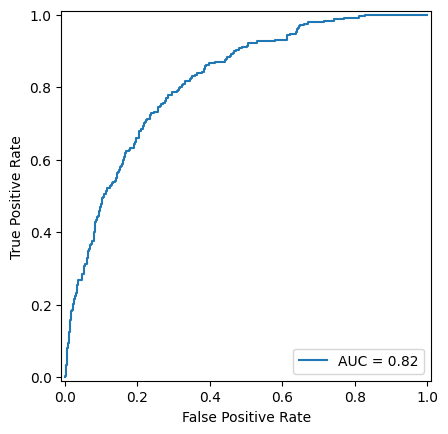

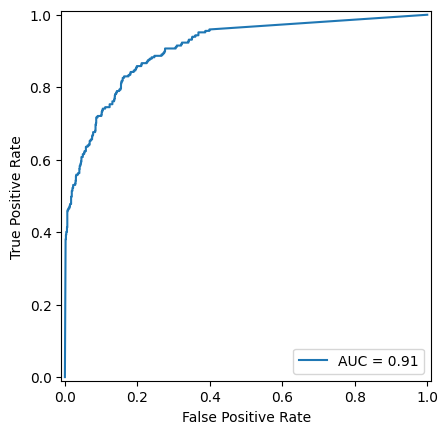

In [114]:
# Comparemos ambos modelos con curvas ROC para mejor interpretacion
y_proba_lr_opt = pipeline_lr_opt.predict_proba(X_test)[:, 1]
y_proba_knn_opt = pipeline_knn_opt.predict_proba(X_test)[:, 1]

print("La primera curva corresponde a Logistic Regression; La segunda curva corresponde a KNN")
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr_opt)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

fpr, tpr, thresholds = roc_curve(y_test, y_proba_knn_opt)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
